<a href="https://colab.research.google.com/github/ian-mutai0/Mchezopesa-Project/blob/main/Ian_Mutai_Week_6_MchezoPesa_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MCHEZOPESA PROJECT**

# 1.0 Defining the Question

> ## i) Specifying the data analytic question

- As a football analyst in a company - Mchezopesa Ltd, I have been tasked to accomplish the task below.

- A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).


> ## ii) Defining the metric of success

- Using Polynomial approach, to be able to come up with two models that can predict the number of goals scored by the home team and the away team respectively
- Using Logistic approach, to be able to figure out from the home team’s perspective if the game was a Win, Lose or Draw (W, L, D)

> ## iii) Understanding the context

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided i.e. logistic and polynomial approaches

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

> ## iv) Recording the Experimental Design

- Reading the dataset into our environment.
- Tidying the data by checking for outliers, null values and duplicates and dealing with them.
-Plotting univariate and bivariate summaries recording the observations.
- Implementing our solution by trying out different models and comparing to get the best model out of all approaches used. 
- Before modelling, make sure to check for multicollinearity.
- Select the target and predictor variables necessary in modelling
- Split the dataset into train and test sets. 
- Convert the categorical variables to numerical variables so as to be able to work with them in our models
- Perform regression (linear, polynomial) but maintain the data to be used for logistic approach. 
- Check for residuals and also test for heteroskedasticity
- Compute the accuracy of the models 
- Challenge the solution by trying to either add additional features or trying different models

> ## v) Data relevance

Given the dataset, we can conclude that it is relevant because in order to predict the goals a home side or away side score in a match, then you'd need to have the rank of the teams, tournament in which the teams are playing and their respective names which are all present columns in our dataset.

# 2.0 Importing the relevant libraries

In [148]:
#Importing our required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error , accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV , KFold , StratifiedKFold , cross_val_score
import warnings 
warnings.filterwarnings('ignore')

# 3.0 Loading the datasets

In [149]:
# Loading the Fifa ranking dataset 
fifa = pd.read_csv('/content/fifa_ranking.csv')
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [150]:
# Checking the number of rows and columns in our Fifa ranking dataset
fifa.shape

(57793, 16)

In [151]:
# Checking the information about our fifa dataset
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [152]:
# Loading the results dataset
results = pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [153]:
# Checking the shape of the results dataset
results.shape

(40839, 9)

In [154]:
# Checking the information about our results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# 4.0 Cleaning the Datasets

## i) Validity 

In [155]:
# Dropping the irrelevant columns from both our datasets
# We'll start with the fifa ranking dataset
fifa.drop(columns = ['cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation', 'country_abrv'], inplace=True)

In [156]:
# Dropping the irrelevant columns in the results dataset
results.drop(columns = ['city'], inplace=True)

## ii) Accuracy

## iii) Completeness

In [157]:
# Checking for null values in the fifa ranking dataset
fifa.isnull().any()

rank               False
country_full       False
total_points       False
previous_points    False
rank_change        False
rank_date          False
dtype: bool

In [158]:
# Checking for null values in the results dataset
results.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
country       False
neutral       False
dtype: bool

## iv) Consistency

In [159]:
# Checking for duplicate values in the fifa ranking dataset
fifa.duplicated().any()

# Dropping the duplicate values
fifa.drop_duplicates(keep='first', inplace=True)

In [160]:
# Checking for duplicate values in the results dataset
results.duplicated().any()

False

## v) Uniformity

In [161]:
# Fifa Ranking Dataset
# Changing column names to upper case and placing underscore to make the column names uniform in the fifa dataset
fifa.columns = fifa.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
fifa.head(5)

,rank,country_full,total_points,previous_points,rank_change,rank_date
0,1,Germany,0.0,57,0,1993-08-08
1,2,Italy,0.0,57,0,1993-08-08
2,3,Switzerland,0.0,50,9,1993-08-08
3,4,Sweden,0.0,55,0,1993-08-08
4,5,Argentina,0.0,51,5,1993-08-08


In [162]:
# Renaming the country column 
fifa.rename({'country_full': 'country'}, axis = 1, inplace = True)

In [163]:
# Locating the year from the rank date 
fifa.rank_date = pd.to_datetime(fifa.rank_date)
fifa['year'] = fifa.rank_date.dt.year
fifa['month'] = fifa.rank_date.dt.month

In [164]:
# Then dropping the rank date column
fifa.drop(['rank_date'], axis=1, inplace=True)

In [165]:
# Results Dataset
# Changing column names to upper case and placing underscore to make the column names uniform in the results dataset
results.columns = results.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [166]:
# Locating the year from the date column
results.date = pd.to_datetime(results.date)
results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

In [167]:
# After previewing the dataset, we notice that the fifa ranking dataset started in 1993
# therefore we can drop all the data before 1993 in the results dataset
results = results[results['date'] >= '1993']

In [168]:
# Then dropping the date column
results.drop(['date'], axis=1, inplace=True)

In [169]:
# Previewing the fifa dataset before merging
fifa.head(0)

,rank,country,total_points,previous_points,rank_change,year,month


In [170]:
# Previewing the results dataset
results.head(0)

,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month


# 5.0 Merging the Datasets

In [171]:
# Lets now merge the two datasets using the home team and away team 
# so as to create home team rank and away team rank columns

In [172]:
# We create a dataframe to get the home rank
home_rank = pd.merge(fifa, results, left_on= ['year','month','country'], right_on= ['year','month','home_team'], how='inner')

# We then drop the unnecessary columns
home_rank.drop(['country_x','rank_change'], axis=1, inplace=True)

# Rename the country column and the rank to home team rank
home_rank.rename({'country_y':'country'}, axis=1, inplace=True)
home_rank.rename({'rank':'home_team_rank'}, axis=1, inplace=True)

# Preview the home rank dataset
home_rank.head(1)

,home_team_rank,total_points,previous_points,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,4,0.0,55,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False


In [173]:
# We create a dataframe to get the away rank
away_rank = pd.merge(fifa, results, left_on= ['year','month','country'], right_on= ['year','month','away_team'], how='inner')
away_rank.head(1)
# We then drop the unnecessary columns
away_rank.drop(['country_x','rank_change'], axis=1, inplace=True)

# Rename the country column and the rank to home team rank
away_rank.rename({'country_y':'country'}, axis=1, inplace=True)
away_rank.rename({'rank':'away_team_rank'}, axis=1, inplace=True)

# Preview the home rank dataset
away_rank.head(1)

,away_team_rank,total_points,previous_points,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,3,0.0,50,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False


In [174]:
# Lets merge the two datasets to get a general dataset that has both the home rank and away rank
fifa_results = pd.merge(home_rank, away_rank, how = 'inner', left_on = ['year','month','away_team'], right_on = ['year','month','away_team'])
fifa_results.head()

# Lets drop the redundant columns 
fifa_results.drop(['total_points_x','previous_points_x','home_team_x','tournament_x','country_x','neutral_x','home_score_x','away_score_x'], axis = 1, inplace=True)

# Lets also rename the remaining columns
fifa_results.rename({'total_points_y':'total_points'}, axis = 1, inplace=True)
fifa_results.rename({'previous_points_y':'previous_points'}, axis = 1, inplace=True)
fifa_results.rename({'home_team_y':'home_team'}, axis = 1, inplace=True)
fifa_results.rename({'away_score_y':'away_score'}, axis = 1, inplace=True)
fifa_results.rename({'home_score_y':'home_score'}, axis = 1, inplace=True)
fifa_results.rename({'tournament_y':'tournament'}, axis = 1, inplace=True)
fifa_results.rename({'country_y':'country'}, axis = 1, inplace=True)
fifa_results.rename({'neutral_y':'neutral'}, axis = 1, inplace=True)

fifa_results.head(0)

,home_team_rank,year,month,away_team,away_team_rank,total_points,previous_points,home_team,home_score,away_score,tournament,country,neutral


# 6.0 Exploratory Data Analysis

## 6.1 Univariate Data Analysis

### 6.1.1 Categorical Variables

> #### i) Frequency Tables

In [175]:
# Frequency Tables
country = fifa_results.country.value_counts()
print("The frequency table of countries is: \n", country)
print("\n")

tournament = fifa_results.tournament.value_counts()
print("The frequency table of the confederations is: \n", tournament)
print("\n")

home = fifa_results.home_team.value_counts()
print("The frequency table of home teams: \n", home)
print("\n")

away = fifa_results.away_team.value_counts()
print("The frequency table of the away teams: \n", away)
print("\n")

tournament = fifa_results.tournament.value_counts()
print("The frequency table of the type of tournament: \n", tournament)
print("\n")

neutral = fifa_results.neutral.value_counts()
print("The frequency table of the neutral venues: \n", neutral)

The frequency table of countries is: 
 United States               1249
South Africa                 637
Qatar                        563
United Arab Emirates         533
France                       521
                            ... 
Yugoslavia                     1
Zanzibar                       1
Sint Maarten                   1
Zaïre                          1
Turks and Caicos Islands       1
Name: country, Length: 222, dtype: int64


The frequency table of the confederations is: 
 Friendly                                10259
FIFA World Cup qualification             5378
UEFA Euro qualification                  1629
African Cup of Nations qualification     1063
CECAFA Cup                                760
                                        ...  
Windward Islands Tournament                 7
SKN Football Festival                       6
Dragon Cup                                  6
Copa del Pacífico                           4
Copa América qualification                  2
N

> #### ii) Pie Charts

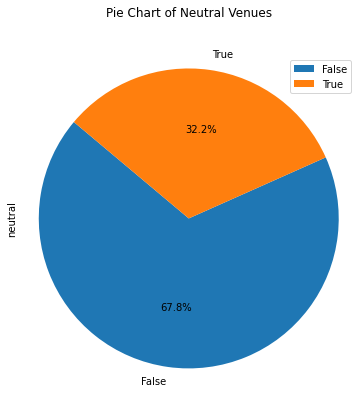

In [176]:
# Pie chart of the matches played in neutral venues
fifa_results['neutral'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of Neutral Venues', y=1.1)
plt.show()

**Majority of matches from 1993 were not played in neutral venues.**

### 6.1.2 Numerical Variables

> #### i) Measures of central tendency

In [177]:
# Mean 
home_mean = fifa_results['home_score'].mean()
print("The average home score is: ", home_mean)
print('\n')

away_mean = fifa_results['away_score'].mean()
print("The average away score is: ", away_mean)
print('\n')


The average home score is:  1.5982629487675375


The average away score is:  1.1081964907345547




In [178]:
# Mode 
home_mode = fifa_results['home_score'].mode()
print("The mode of the home score is: ", home_mode)
print('\n')

away_mode = fifa_results['away_score'].mode()
print("The mode of the away score is: ", away_mode)
print('\n')

The mode of the home score is:  0    1
dtype: int64


The mode of the away score is:  0    0
dtype: int64




In [179]:
# Median
home_median = fifa_results['home_score'].median()
print("The median of the home score is: ", home_median)
print('\n')

away_median = fifa_results['away_score'].median()
print("The median of the away score is: ", away_median)
print('\n')

The median of the home score is:  1.0


The median of the away score is:  1.0




#### ii) Measures of Dispersion

In [180]:
# Standard Deviation
fifa_results.std()

home_team_rank      51.097232
year                 6.844128
month                3.357881
away_team_rank      52.575171
total_points       295.961148
previous_points    313.159775
home_score           1.638995
away_score           1.311873
neutral              0.467313
dtype: float64

In [181]:
# Variance
fifa_results.var()

home_team_rank      2610.927133
year                  46.842089
month                 11.275362
away_team_rank      2764.148577
total_points       87593.000931
previous_points    98069.044495
home_score             2.686305
away_score             1.721010
neutral                0.218382
dtype: float64

In [182]:
# Quantiles
fifa_results[['home_score','away_score']].quantile([0.25,0.50,0.75])

,home_score,away_score
0.25,0.0,0.0
0.50,1.0,1.0
0.75,2.0,2.0


In [183]:
# Range
max = fifa_results[['home_score','away_score']].max()
min = fifa_results[['home_score','away_score']].min()
range = max - min
print("The range within the fifa results is: \n", range)

The range within the fifa results is: 
 home_score    31
away_score    18
dtype: int64


In [184]:
# Kurtosis
home_kurt = fifa_results['home_score'].kurt()
print("The kurtosis of the home score is: \n", home_kurt)

if home_kurt > 0:
  print("The home score is leptokurtic")
elif home_kurt < 0:
  print("The home score is platykurtic")
else:
  print("The home score is mesokurtic")
print('\n') 

away_kurt = fifa_results['away_score'].kurt()
print("The kurtosis of the away score is: \n", away_kurt)

if away_kurt > 0:
  print("The away score column is leptokurtic")
elif away_kurt < 0:
  print("The away score is platykurtic")
else:
  print("The away score is mesokurtic")
print('\n') 

The kurtosis of the home score is: 
 18.12172739714042
The home score is leptokurtic


The kurtosis of the away score is: 
 11.979576292768837
The away score column is leptokurtic




In [185]:
# Skewness
home_skew = fifa_results['home_score'].skew()
print("The skewness of the home score is: \n", home_skew)
if home_skew == 0:
  print("The distribution is symmetrical")
elif home_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

away_skew = fifa_results['away_score'].skew()
print("The skewness of the away score is: \n", away_skew)
if away_skew == 0:
  print("The distribution is symmetrical")
elif away_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness of the home score is: 
 2.5581694008775417
The distribution is positively skewed


The skewness of the away score is: 
 2.315108665073267
The distribution is positively skewed




In [186]:
# Summary Statistics
home = fifa_results['home_score'].describe().astype(str)
print("The summary statistics for the home score are: \n", home)
print('\n')
away = fifa_results['away_score'].describe().astype(str)
print("The summary statistics for the away score are: \n", away)


The summary statistics for the home score are: 
 count               28439.0
mean     1.5982629487675375
std      1.6389952541289845
min                     0.0
25%                     0.0
50%                     1.0
75%                     2.0
max                    31.0
Name: home_score, dtype: object


The summary statistics for the away score are: 
 count               28439.0
mean     1.1081964907345547
std       1.311872667274135
min                     0.0
25%                     0.0
50%                     1.0
75%                     2.0
max                    18.0
Name: away_score, dtype: object


#### iii) Visualization Techniques

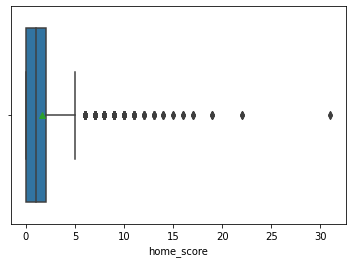

In [187]:
# Checking for outliers in the home scores
sns.boxplot(fifa_results['home_score'], showmeans=True)

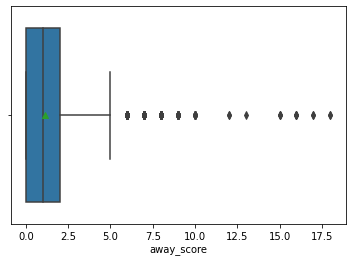

In [188]:
# Checking for outliers in the away scores
sns.boxplot(fifa_results['away_score'], showmeans=True)

**We will not drop any outliers because the goals scored either by the home team or away team are actual representations of the goals scored therefore they are necessary in our analysis.**

## 6.2 Bivariate Data Analysis

### 6.2.1 Numerical and Numerical Values

> #### i) Scatter Plots

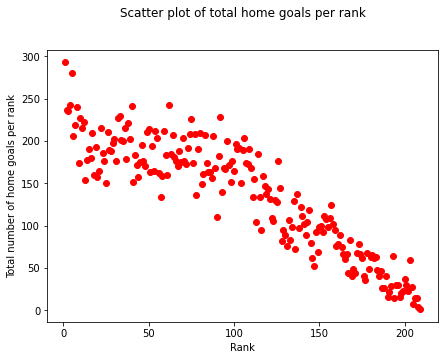

In [189]:
# Scatter plot between the rank and the home goals scored
home_rank=fifa_results.groupby('home_team_rank')['home_score'].count().reset_index(name='total number of home goals per rank')
plt.figure(figsize=(7,5))
plt.scatter(home_rank['home_team_rank'] , home_rank["total number of home goals per rank"], color='red')
plt.xlabel("Rank")
plt.ylabel("Total number of home goals per rank")
plt.title("Scatter plot of total home goals per rank", y=1.1)
plt.show()

**This scatter plot suggests that as the rank of the countries increases, the total number of home goals reduces. It makes sense since the highest ranked countries score the most home goals and the least ranked countries score the least goals.**

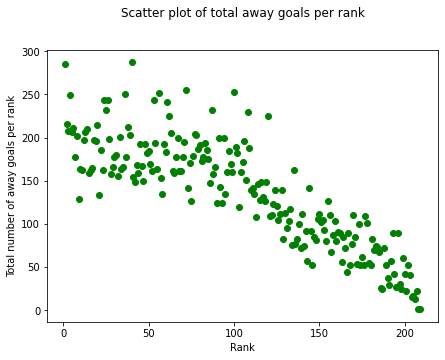

In [190]:
# Scatter plot betwwen the rank and the number of away goals scored
away_rank=fifa_results.groupby('away_team_rank')['away_score'].count().reset_index(name='total number of away goals per rank')
plt.figure(figsize=(7,5))
plt.scatter(away_rank['away_team_rank'] , away_rank["total number of away goals per rank"], color = 'green')
plt.xlabel("Rank")
plt.ylabel("Total number of away goals per rank")
plt.title("Scatter plot of total away goals per rank", y=1.1)
plt.show()

**This scatter plot suggests that the higher the rank, the less away goals scored by the countries.**

> #### ii) Correlation matrix

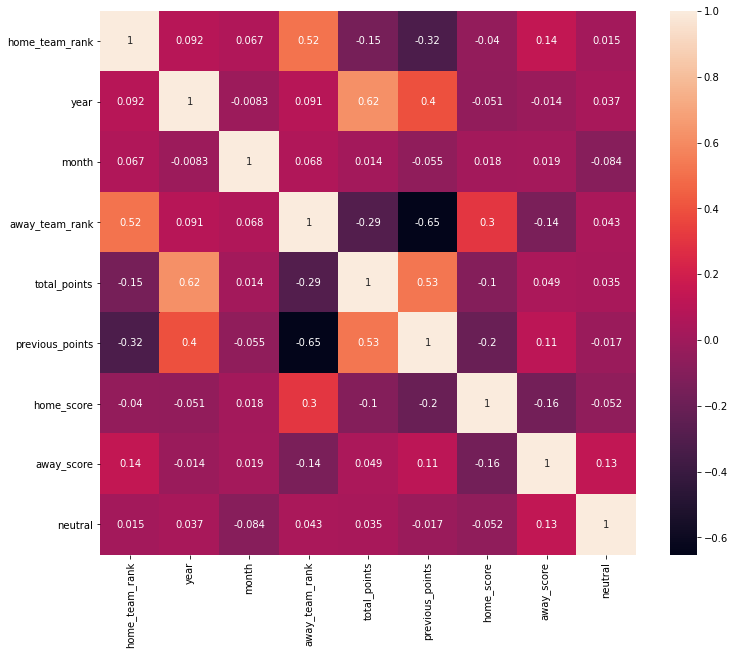

In [191]:
# Visualization using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(fifa_results.corr(), annot=True)
plt.show()

### 6.2.2 Categorical and Numerical Variables

> #### i) Z-score

In [192]:
# Z-score
from scipy import stats
home= fifa_results['home_score']
away= fifa_results['away_score']
home_zscore = stats.zscore(home)
print("The z score for home scores is: \n", home_zscore)
print('\n')

away_zscore = stats.zscore(away)
print("The z score for away scores is: \n", away_zscore)
print('\n')

The z score for home scores is: 
 [-0.36502453 -0.36502453  0.24511609 ...  2.68567858 -0.97516515
 -0.97516515]


The z score for away scores is: 
 [ 0.67980621 -0.08247629 -0.08247629 ... -0.8447588  -0.8447588
 -0.8447588 ]




# 7.0 Implementing the Solution

## 7.1 Feature Engineering

In [193]:
# Generating a status column
# Creating a list to display the conditions of the match
# from the home team's perspective 
conditions = [
    (fifa_results['home_score'] > fifa_results['away_score']),
    (fifa_results['home_score'] < fifa_results['away_score']),
    (fifa_results['home_score'] == fifa_results['away_score'])
    ]

# Create a list of the status we want to assign for each condition
status = ['Win', 'Lose', 'Draw']

# Create a new column and use np.select to assign values to it using our lists as arguments
fifa_results['status'] = np.select(conditions, status)

In [194]:
# Genearting a column that tells us whether the tournament was a friendly or not
def tournament(t):
    if t == 'Friendly':
        return 'Friendly'
    else:
        return 'Not Friendly'
      
fifa_results['tournament_type'] = fifa_results.tournament.apply(lambda i: tournament(i))

In [195]:
# Previewing the dataset after adding the new features
fifa_results.head()

,home_team_rank,year,month,away_team,away_team_rank,total_points,previous_points,home_team,home_score,away_score,tournament,country,neutral,status,tournament_type
0,4,1993,8,Switzerland,3,0.0,50,Sweden,1,2,Friendly,Sweden,False,Lose,Friendly
1,4,1993,8,France,12,0.0,45,Sweden,1,1,FIFA World Cup qualification,Sweden,False,Draw,Not Friendly
2,5,1993,8,Peru,70,0.0,16,Paraguay,2,1,FIFA World Cup qualification,Paraguay,False,Win,Not Friendly
3,5,1993,8,Peru,70,0.0,16,Argentina,2,1,FIFA World Cup qualification,Argentina,False,Win,Not Friendly
4,5,1993,8,Peru,70,0.0,16,Colombia,4,0,FIFA World Cup qualification,Colombia,False,Win,Not Friendly


## 7.2 Checking for Multicollinearity

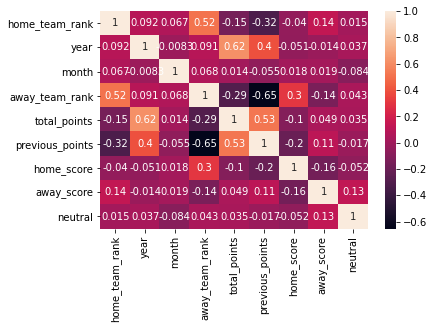

In [196]:
# Correlation 
correlation = fifa_results.corr()

# Visualizing the correlation using a heatmap
sns.heatmap(fifa_results.corr(), annot=True)
plt.show()

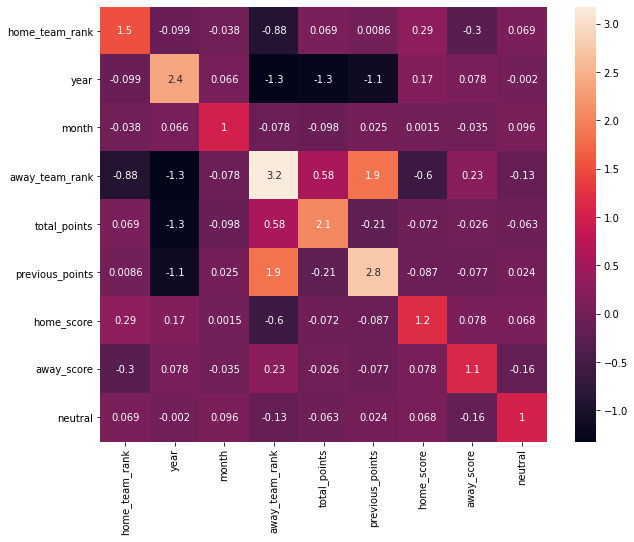

In [197]:
# Checking for collinearity using the VIF (Variation Inflation Factor)
vif = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# Visualize the VIF using a heatmap
plt.subplots(figsize =  (10,8))
sns.heatmap(vif, annot = True)
plt.show()


## 7.3 Polynomial Regression

In [198]:
# We first select the columns that we will use in our modelling
fifa = fifa_results[["home_team","away_team","home_score","away_score","home_team_rank","away_team_rank","tournament_type","status"]]
fifa.head()

,home_team,away_team,home_score,away_score,home_team_rank,away_team_rank,tournament_type,status
0,Sweden,Switzerland,1,2,4,3,Friendly,Lose
1,Sweden,France,1,1,4,12,Not Friendly,Draw
2,Paraguay,Peru,2,1,5,70,Not Friendly,Win
3,Argentina,Peru,2,1,5,70,Not Friendly,Win
4,Colombia,Peru,4,0,5,70,Not Friendly,Win


> ### Model 1 : Predicting the home score

In [199]:
# Locating the columns we will use
X = fifa.iloc[:, [0,1,3,4,5,6]]
Y = fifa.home_score

In [200]:
# Encoding the categorical vriables using the get dummies function
X = pd.get_dummies(X, drop_first=True)

In [201]:
#Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [202]:
#Standardising the data to the same scale
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [203]:
# Introducing polynomial features to our dataset
poly_features = PolynomialFeatures(degree = 1)

# Fit and transform the X variable to have the polynomial features
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [204]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [205]:
# Making predictions

y_pred = regressor.predict(X_test)

In [206]:
# Measuring the accuracy of the model using the root mean square 

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.3479937253566339


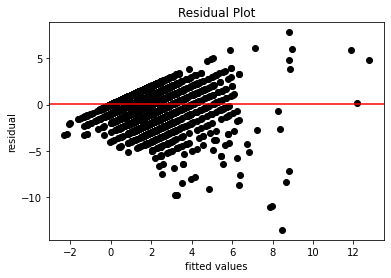

In [207]:
# Plotting the residuals 
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

> ### Model 2: Predicting the away score

In [208]:
# Locating the columns we will use
X = fifa.iloc[:, [0,1,2,4,5,6]]
Y = fifa.away_score

In [209]:
# Encoding the categorical vriables using the get dummies function
X = pd.get_dummies(X, drop_first=True)

In [210]:
#Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [211]:
#Standardising the data to the same scale
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [212]:
# Introducing polynomial features to our dataset
poly_features = PolynomialFeatures(degree = 1)

# Fit and transform the X variable to have the polynomial features
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [213]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
# Making predictions

y_pred = regressor.predict(X_test)

In [215]:
# Measuring the accuracy of the model using the root mean square 

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.1404901689205738


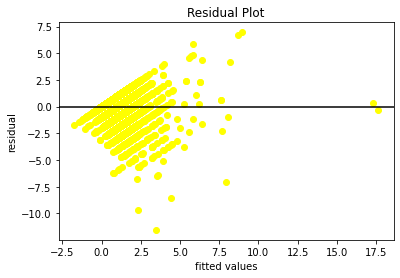

In [216]:
# Plotting the residuals 
residuals = y_pred - y_test

# Plotting the prediction errors using a residuals plot

plt.scatter(y_pred, residuals, color='yellow')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

## 7.4 Logistic Regression

### Model : Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [217]:
# Locating the columns we will use
X = fifa.iloc[:, [0,1,2,3,4,5,6]]
Y = fifa.status

In [218]:
# Encoding the categorical variables using the get dummies function
X = pd.get_dummies(X, drop_first=True)

In [219]:
# Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 30)

In [220]:
# Introducing logistic regression to our dataset
logistic = LogisticRegression()

# Fit and transform the train sets
logistic.fit(X_train, y_train)

# Making predictions using the logistic model
y_pred = logistic.predict(X_test)

In [221]:
# Measuring the accuracy of the model using the accuracy_score function
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})

The accuracy of the model is {1.0}


# 8.0 Challenging the Solution

## 8.1 Cross Validation

In [222]:
fifa.head(1)

,home_team,away_team,home_score,away_score,home_team_rank,away_team_rank,tournament_type,status
0,Sweden,Switzerland,1,2,4,3,Friendly,Lose


In [223]:
# Performing Data Preprocessing
X = fifa.iloc[:, [0,1,3,4,5,6]]
y = fifa.home_score

In [224]:
# Encoding the categorical variables using the get dummies function
X = pd.get_dummies(X, drop_first=True)

In [225]:
# Splitting the data into the test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [226]:
# Scaling our Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [227]:
# Training and Cross Validation

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [228]:
# Training and Cross Validation
# Next, to implement cross validation, the cross_val_score method 
# of the sklearn.model_selection library can be used.
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [229]:
# Printing the accuracies returned for ten folds 
print(all_accuracies.mean())

0.5517376586456549


**While using cross validation, I was able to compute the accuracy for predicting the home score as returned by 10 folds to be 55% which is very low.** 